# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import math

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)

Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
data = data.sample(frac = 1)
data_train = data.iloc[:624]
data_train.reset_index(drop = True, inplace = True)
data_test = data.iloc[624:]
data_test.reset_index(drop = True, inplace = True)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [ ]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Cabin', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [ ]:
data_train_from_func = get_features_and_target(data_train)

data_train_features = data_train_from_func[0]
print(data_train_features.shape)

data_train_target = data_train_from_func[1]
print(data_train_target.shape)

data_test_from_func = get_features_and_target(data_test)
data_test_features = data_test_from_func[0]
print(data_test_features.shape)

data_test_target = data_test_from_func[1]
print(data_test_target.shape)


(624, 6)
(624,)
(267, 6)
(267,)


#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

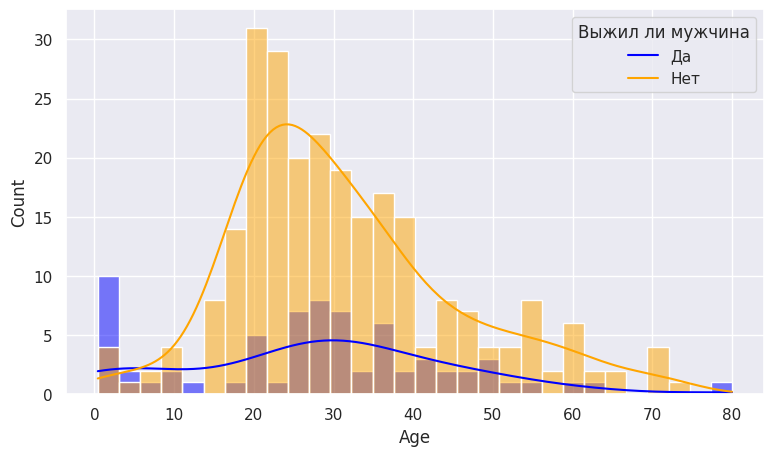

In [ ]:
male_data = data_train[data_train['Sex'] == 'male']
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
plt.figure(figsize=(9, 5))
sns.histplot(data=male_data, x='Age', hue='Survived', bins=30, kde=True, palette={0: 'orange', 1: 'blue'})
plt.legend(title="Выжил ли мужчина", labels=["Да", "Нет"])
plt.rcParams['axes.facecolor'] = 'black'
plt.show()

Построили график-диграмму зависимости количества мужчин от их выживаемости. Как мы знаем, спасались в первую очередь женщины и дети, поэтому у детей-мужчин выживаемость преобладает над смертностью. Во всех же остальных случаях, судя по графику, подавяющее большинство мужчин погибло

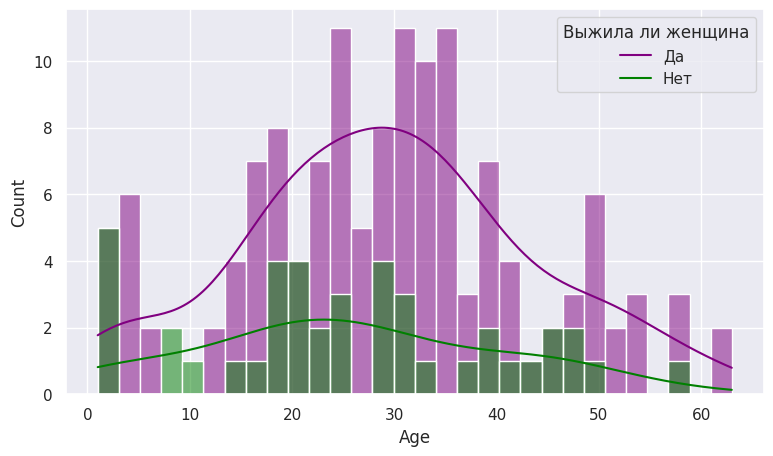

In [ ]:
female_data = data_train[data_train['Sex'] == 'female']
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
plt.figure(figsize=(9, 5))
sns.histplot(data=female_data, x='Age', hue='Survived', bins=30, kde=True, palette={0: 'green', 1: 'purple'})
plt.legend(title="Выжила ли женщина", labels=["Да", "Нет"])
plt.rcParams['axes.facecolor'] = 'black'
plt.show()

как я и говорил выше, выживали в основном женщины. На этои графике это и прекрасно видно: почти во всех точках от 20 до 40 лет выживаемость преобладает над смертностю более чем в 2 раза. Удивительным является то, что 5 девушек самом первом столбце погибли, ведь спасали в первую очередь детей. Рискну предположить, что это произошло не преднамеренно, а они, например, насмерть замерзли при эвакуации, ведь детский организм не так легко приспосабливается к холоду

In [ ]:
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=data_train, x='Age', hue='Survived',  bins=30, kde=True)
    plt.legend(title="Выжил ли человек", labels=["Да", "Нет"])

на данном графике представлена зависимость числа выживших пассажиров от возраста. Поведение этого графика вполне предугадываемо: мы знаем, что почти все мужчины погибали, а почти все женщины выживали. То есть для интуитивного построения этого графика нам стоило бы чуть опустить черту смертности и поднять черту выживаемости на графике, который обозначал бы средние значения. На этом графике прекрасно видно, что в первую очередь спасали детей: от 0 до 12 лет соотношение гибелей к выживанию, согласно этому графику, 14:31.

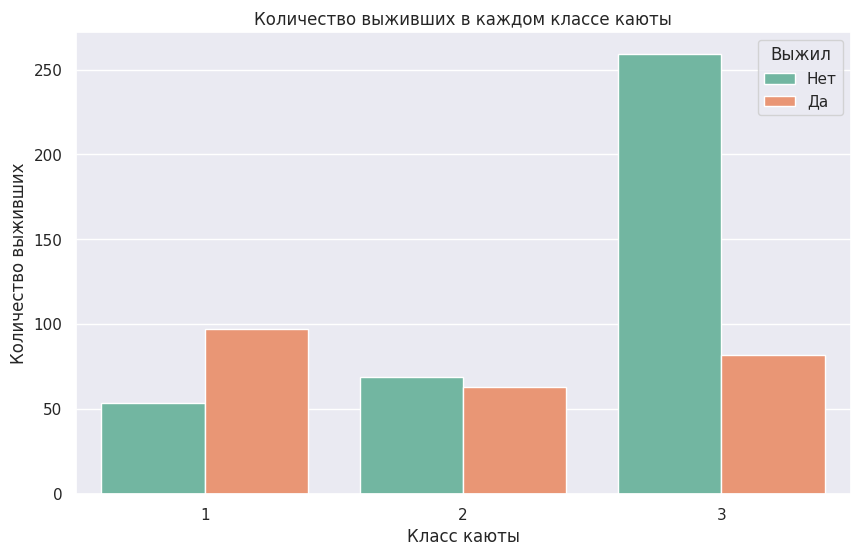

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=data_train, palette='Set2')
plt.title('Количество выживших в каждом классе каюты')
plt.xlabel('Класс каюты')
plt.ylabel('Количество выживших')
plt.legend(title='Выжил', labels=['Нет', 'Да'])
plt.show()

на данном графике представлена зависимость числа выжиивших от их класса каюты. Можно сделать вывод, что переплатить всё-таки имело смысл. Согласно сайту https://ru.wikipedia.org/wiki/%D0%A2%D0%B8%D1%82%D0%B0%D0%BD%D0%B8%D0%BA, каюты первого класса размещались на палубах от A до Е в центральной части судна, что позволяло свести к минимуму воздействие на пассажиров килевой и бортовой качек, а также избавить от шума и вибраций, создаваемых двигателями и гребными винтами. Таким образом, толчок от удара о айсберг был минимален. Также согласно сайту https://clck.ru/39Wd2g, удар айсберга пришелся на переднюю правую сторону корабля и, глядя на изображение https://hmhsbritannic.ucoz.ru/_ph/11/260214876.jpg, можем заметить, что именно там находились места пассажиров третьего класса. Бинго

In [ ]:
aggregated_data = data_train.groupby('Fare')['Survived'].sum().reset_index()

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

sns.histplot(data=data_train, x='Fare', bins=30, color='skyblue', kde=False, label='Выжившие пассажиры')
plt.title('Сумма, заплаченная за билет, и количество выживших')
plt.yscale("log")
plt.xlabel('Сумма, заплаченная за билет (Fare)')
plt.ylabel('Количество выживших')

plt.legend()


этот график коррелирует с предыдущим, ведь класс каюты напрямую зависит от платы за билет. Отсюда можно сделать вывод, что больше всего было пассажиров, заплативших до 200 у.е. и, соответсвенно вследствие этого выживших. \\
 вот вообще хочу выразить негодование по этому. В 1912 в Саутгемптоне (Англия) в ходу были фунты стерлингов и билеты в первый класс стоили от 23 фунтов стерлингов, во второй от 10 до 40, а в первый же от 2 до 8. Соответственно как-то не слишком ясна мне таблица из Кагла, обозначающая стоимость билета от 0 до 500. Скажете вы, что это в долларах, да не тут-то было: даже 23 фунта это 1311 долларов. Поэтому надеюсь, что моё негодование поддержит читатель

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [ ]:
data_test_for_knn = data_test.copy()
data_train_for_knn = data_train.copy()
data_train_for_knn['Age'].fillna(data_train_for_knn['Age'].mean(), inplace=True)
data_test_for_knn['Age'].fillna(data_test_for_knn['Age'].mean(), inplace=True)

data_train_for_knn['Fare'].fillna(data_train_for_knn['Fare'].mean(), inplace=True)
data_test_for_knn['Fare'].fillna(data_test_for_knn['Fare'].mean(), inplace=True)

data_train_for_knn['Age'] /= data_train_for_knn['Age'].max()
data_test_for_knn['Age'] /= data_test_for_knn['Age'].max()

data_train_for_knn['Fare'] /= data_train_for_knn['Fare'].max()
data_test_for_knn['Fare'] /= data_test_for_knn['Fare'].max()



In [ ]:
import numpy as np
import pandas as pd

def find_nearest_points_second(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    return np.argsort(((B - A[:, np.newaxis, :]) ** 2).sum(axis=2).T)[:, :k]

def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''
    result = []
    predict = []
    features = features[['Age', 'Fare']]
    train_features = train_features[['Age', 'Fare']]
    predict = find_nearest_points_second(train_features.values, features.values, k)
    for pers in predict:
      sum = train_target[pers].sum()
      if (sum > (k/2)):
        result.append(1)
      else:
        result.append(0)
    return pd.DataFrame(result).rename(columns={0: 'Survived'})

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Для построения классификатора методом ближайшего соседа на основе признаков Age и Fare мы будем использовать евклидово расстояние в качестве метрики.

Перед построением классификатора мы предварительно масштабируем признаки Age и Fare, разделив их на их максимальные значения.

Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [ ]:
print("number of survived for 3:", knn(data_test, data_train, data_train_target, k=3).sum().sum())
print("number of survived for 5:", knn(data_test, data_train, data_train_target, k=5).sum().sum())
print("number of survived for 7:", knn(data_test, data_train, data_train_target, k=7).sum().sum())

number of survived for 3: 85
number of survived for 5: 76
number of survived for 7: 70


Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?

мы можем наткнуться на множество проблем. Данная таблица не полна, то есть множество значений утеряно и имеют значение NaN. В данном случае я заменял пропущенные значения на средние. Если бы мы хотели учесть другие признаки, то пришлось бы выходить из плоскости в прямом смысле этого слова и работать не с прямоугольными матрицами, а с параллелепипедальными и тд.

Строить классификатор с другими признаками при этом не нужно.

Если бы мы хотели учесть другие признаки в классификации методом ближайших соседей, мы могли бы расширить пространство признаков, используемых для вычисления расстояния между объектами. Для этого мы могли бы включить дополнительные признаки, такие как пол, класс каюты, наличие родственников на борту и другие.

Однако при использовании дополнительных признаков могут возникнуть следующие проблемы:

Пропущенные значения: Дополнительные признаки могут содержать пропущенные значения, которые требуется обработать. Мы могли бы заполнить пропущенные значения средними, медианными или модальными значениями, либо использовать другие методы заполнения.

Категориальные признаки: Если среди дополнительных признаков есть категориальные переменные (например, пол или класс каюты), то необходимо провести их кодирование, например, с помощью метода one-hot encoding.

Масштабирование: Различные признаки могут иметь разный масштаб, что может искажать расстояние между объектами. Поэтому перед использованием дополнительных признаков необходимо выполнить их масштабирование, например, методом стандартизации или нормализации.

Выбор признаков: Не все признаки могут быть полезны для классификации, и некоторые из них могут быть шумовыми или неинформативными. Поэтому перед включением дополнительных признаков необходимо провести их анализ и выбор наиболее значимых признаков.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

Это дерево решений будет иметь максимальную глубину 2 и будет основано на признаке Fare (стоимость билета). Если стоимость билета превышает 70 долларов, предполагаем, что пассажир выжил.

**Дерево 2:**

Это также будет дерево решений с максимальной глубиной 1. Оно будет основано на признаке Sex (пол) и Age (возраст). Если пассажир женский, предполагаем, что он выжил. Если пассажир мужской и младше 18 лет, также предполагаем, что он выжил.
Реализуйте полученные деревья по шаблону

In [ ]:
features = data_train


def tree1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = features.copy()
    for row in features.itertuples():
        if row.Fare > 70:
            predicted.loc[row.Index, 'Survived'] = 1
        else:
            predicted.loc[row.Index, 'Survived'] = 0
    return predicted

In [ ]:
features = data_train


def tree2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = features.copy()
    for row in features.itertuples():
        if row.Sex == 'female':
          if row.Age > 10:
            predicted.loc[row.Index, 'Survived'] = 1
          else:
            predicted.loc[row.Index, 'Survived'] = 0
        else:
          if row.Age < 5:
            predicted.loc[row.Index, 'Survived'] = 1
          else:
            predicted.loc[row.Index, 'Survived'] = 0
    return predicted

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Мы можем использовать точность (accuracy) в качестве критерия качества предсказаний нашего дерева решений. Точность позволяет оценить долю правильных предсказаний относительно всех предсказаний.

Реализуйте данный критерий по шаблону

In [ ]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted,
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    data = target == predicted["Survived"]
    return round(((data.sum() / len(target)) * 100), 2)

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

criteria(data_test_target, tree1(data_test))

68.16

In [ ]:
import warnings
warnings.filterwarnings("ignore")

criteria(data_test_target, tree2(data_test))

76.4

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

In [ ]:
k_values = list(range(1, 11))
accuracy_values = []

for k in k_values:
    predicted = knn(data_test, data_train, data_train_target, k)
    print(predicted)
    accuracy_values.append(criteria(data_test_target, predicted))

# Построение графика
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Зависимость accuracy от k в методе ближайшего соседа')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

     Survived
0           1
1           1
2           0
3           0
4           0
..        ...
262         1
263         1
264         0
265         0
266         0

[267 rows x 1 columns]
     Survived
0           0
1           0
2           0
3           0
4           0
..        ...
262         0
263         1
264         0
265         0
266         0

[267 rows x 1 columns]
     Survived
0           1
1           0
2           0
3           0
4           1
..        ...
262         1
263         1
264         0
265         0
266         0

[267 rows x 1 columns]
     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
262         0
263         1
264         0
265         0
266         0

[267 rows x 1 columns]
     Survived
0           0
1           1
2           0
3           0
4           1
..        ...
262         0
263         1
264         0
265         0
266         0

[267 rows x 1 columns]
     Survived
0           0
1           

При маленьком значении k (например, k=1) модель оказывается слишком гибкой и подвержена переобучению. Это означает, что модель слишком чувствительна к выбросам или шумам в данных, что приводит к низкой точности на тестовом наборе данных.

При увеличении значения k модель становится менее гибкой и более устойчивой к выбросам. Однако, если выбрать слишком большое значение k, модель может потерять способность различать классы и стать недостаточно чувствительной.

судя по графику, выше точности мы уже не получим, ведь разницы критерия у 9 и 10 соседей нет. Оптимальным числом соседей я бы назвал 2

#### 6. Выводы

это была моя первая работа по анализированию данных. к сожалению, на нее я потратил уйму времени, но, надеюсь, это того стоило. \\
В результате проделанной работы можно сделать некоторые выводы про выживаемость на Титанике. Почти все мои гипотезы подтвердились: женщины и дети выживают в первую очередь. Это, собственно, и было рассмотрено в моём ноутбуке, который показал данную вероятность в приблизительном значении 80% \\
Стоит отметить, что строить графики оказалось так увлекательно
